# Проект: "Исследование оттока клиентов регионального банка"

# Материалы: 
* [Презентация](https://disk.yandex.ru/i/PjF3fZ2dI5ulvA)
* [Дашборд](https://public.tableau.com/views/Book1_16618591196380/Dashboard2?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

# Содержание работы

# [Шаг 1](#step_1) - Загрузка данных 
Загрузка датасета 

# [Шаг 2](#step_2) - Предобработка данных 
Оценка размера датасета, названий столбцов, пропусков значений и типов данных

# [Шаг 3](#step_3) - Исследовательский анализ данных 
- Выбор целевой переменной для исследования;
- Изучить средние значения и стандартные отклонения столбцов;
- Изучить средние значения признаков и их распределения по признаку оттока;
- Изучить матрицу корреляции на наличие коррелирующих признаков. 

# [Шаг 4](#step_4) - Сегментация данных 
При помощи алгоритма `Kmeans` разделим клиентов на группы и изучим портрет клиента в каждой из групп. 
- Стандартизация данных для изучения;
- Поиск оптимального количества кластеров для разделения (каким-либо из методов на выбор- эмпирическим путем, дендрограмма или "метод локтя");
- Обучить модель кластеризации на основании алгоритма `Kmeans` с найденным выше количеством кластеров;
- Изучить значения признаков для каждого из кластеров;
- Исследовать долю оттока каждого из кластеров;
- Построить портрет пользователя каждого кластера.


# [Шаг 5](#step_5) - Проверка гипотез 
В ходе работы будут проверены 2 гипотезы. 

**Гипотеза №1**: 
- **Н0**: Доходы ушедших и оставшихся клиентов равны.
- **Н1**: Доходы ушедших клиентов больше, чем у оставшихся.

**Гипотеза №2**: 
- **Н0**: Доля ушедших клиентов одинакова для всех городов. 
- **Н1**: Между долями ушедших клиентов, обслуживающихся в различных городах, есть статистическая разница. 

# [Шаг 6](#step_6) - Выводы и рекомендации 
Выводы и рекомендации на основании полученных данных.

-------------------------------------------------------------------------------------------------------------------

# Цели и задачи работы

**Цель данной работы** - проанализировать отток клиентов «Метанпромбанка» в трех городах присутствия: Ярославль, Рыбинск и Ростов Великий и составит портрет клиентов, склонных уходить из банка. 

В ходе работы были решены следующие задачи: 
- Проведен исследовательский анализ данных, 
- Проведена сегментизация клиентов методом KMeans, 
- Составлен портрет клиента для каждого кластера в разрезе оттока, 
- Проверены статистические гипотезы,
- Сделаны выводы и рекомендации исходя из полученных данных.


# Шаг 1- Загрузка данных и импорт библиотек <a id="step_1"></a>

Перед началом работы импортируем все необходимые библиотеки и загрузим датасет в переменную `data`:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import math as mth
import matplotlib.ticker as ticker
import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r'C:\Users\Seal\PycharmProjects\datasets\bank_dataset.csv')

# Шаг 2 - Предобработка данных <a id="step_2"></a>
На следующем шаге проведем предобработку данных. При помощи функции `pre_processing` оценим размер датасета, информацию о названии и заполнении столбцов, а также проверим количество строк-дубликатов. Проверку на дубликаты проведу без столбца `userid`, т.к. в таблице могут присутствовать строки-дубликаты, но автоматическое назначение `userid` при каждом внесении информации в файл может дать нам ошибочное представление об отсутствии таковых. 

In [3]:
def pre_processing(df):
    """
    Данная функция выводит информацию о размере и составе датасета, а также выводит первые 5 строк датасета
    """
    print('Размер датасета:{}'.format(df.shape))
    print()
    print(df.info())
    print()
    print('Количество строк-дубликатов:{}'.format(df.drop(['userid'], axis = 1).duplicated().sum()))
    display(df.head())

In [4]:
pre_processing(data)

Размер датасета:(10000, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None

Количество строк-дубликатов:0


,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


Итак, функция `pre_processing` успешно отработала и дала следующую информацию: 

1. Размер датасета: 12 столбцов, 10000 строк.
2. Необходимо провести форматирование названий столбцов и привести их к единому стандарту. <a id="point_2"></a> 
3. В колонке `Balance` - около 37% пропусков, необходимо сделать обработку пропусков. <a id="point_3"></a> 
4. Дубликаты в таблице отсутствуют.
5. В колонках `Gender` и `City` - категориальные признаки. Необходимо перевести эти признаки в числовое представление. 
<a id="point_5"></a> 

Приступим к предобработке и начнем с [пункта 5](#point_5) - кодирования категориальных признаков. 
Перед этим создадим датафрейм `data_city_churn`, в котором посчитаем долю жителей каждого из представленных городов в разрезе оттока. 

In [5]:
data_city_churn = data.pivot_table(index = 'City', columns = 'Churn', values = 'userid', aggfunc = 'count')
data_city_churn[0] = round(data_city_churn[0].div(data_city_churn[0].sum(), axis = 0)*100, 2)
data_city_churn[1] = round(data_city_churn[1].div(data_city_churn[1].sum(), axis = 0)*100, 2)
data_city_churn.columns = ['churn_no', 'churn_yes']
data_city_churn

,churn_no,churn_yes
City,,
Ростов Великий,21.29,39.96
Рыбинск,25.92,20.27
Ярославль,52.79,39.76


Как я вижу, в процессе округления в столбце оттока потерялась 0,01 (сумма значений составляет 99,99). Я изучила данные до округления и поняла, что значение пропало в процессе округления данных оттока в г. Рыбинске. Прибавим туда 0,01 вручную.

In [6]:
data_city_churn.iloc[1]['churn_yes'] = 20.28
data_city_churn

,churn_no,churn_yes
City,,
Ростов Великий,21.29,39.96
Рыбинск,25.92,20.27
Ярославль,52.79,39.76


Для декодирования использую функцию `columns_encoder`. Декодирование колонки `Gender` производем в исходной колонке, для декодирования городов создадим отдельные столбцы. 
Но перед тем, как применить функцию, я сохраню старую версию таблицы в переменную `data_temp` <a id="data_temp"></a> - возможно, в дальнейшем мне понадобится именно такая версия таблицы. Результат отработки функции `columns_encoder` сохраним в исходную переменную `data`.

In [7]:
def columns_encoder(df):
    """
    Функция декодирует столбцы городов (city) и гендера (gender) в числовые значения. 
    
    Гендер: М = 0, Ж = 1 (декодируем в одном столбце)
    Города: декодируем в три столбца (каждый столбец для своего города)
    """
    df['Gender'] = pd.get_dummies(df['Gender'])
    df = pd.get_dummies(df)
    
    display(df.head()) 
    return df

In [8]:
data_temp = data #сохраняем старую версию датасета с незакодированными городами
data = columns_encoder(data)

,userid,score,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn,City_Ростов Великий,City_Рыбинск,City_Ярославль
0,15677338,619,1,42,2,NaN,1,1,1,101348.88,1,0,0,1
1,15690047,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15662040,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,15744090,699,1,39,1,NaN,2,0,0,93826.63,0,0,0,1
4,15780624,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Приступлю к [пункту 2](#point_2) - приведение названий колонок к единому стандарту. Для этого я переименую колонки встроенной функцией `rename()` и переведу их в нижний регистр с помощью `list comprehension`:

In [9]:
data = data.rename(columns = {'userid': 'user_id', 'CreditCard': 'Credit_Card', 'City_Ростов Великий': 'Rostov_Vel',
                             'City_Рыбинск': 'Rybinsk', 'City_Ярославль': 'Yaroslavl'})
data.columns = [x.lower() for x in data.columns]

И последний этап предобработки описан в [пункте 3](#point_3) - заполнение пропусков в колонке `balance`. 
Если посмотреть на строки, в которых допущены пропуски в колонке `balance`, то какие-то закономерности не выявляются. 
Всего по колонке пропущено около 37% от общего числа значений- это очень много. Заполнять какими-то медианными или средними данными некорректно - попробуем изучить распределение в столбцах `age`, `estimated_salary`, `credit_card`, `objects` и `score`, чтобы найти закономерность, которая может натолкнуть на взаимосвязь с пропусками. 

In [10]:
data.query('balance != balance').head()

,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,rostov_vel,rybinsk,yaroslavl
0,15677338,619,1,42,2,NaN,1,1,1,101348.88,1,0,0,1
3,15744090,699,1,39,1,NaN,2,0,0,93826.63,0,0,0,1
6,15635267,822,0,50,7,NaN,2,1,1,10062.80,0,0,0,1
11,15779909,497,0,24,3,NaN,2,1,0,76390.01,0,0,1,0
12,15675000,476,1,34,10,NaN,2,1,0,26260.98,0,0,0,1


Если изучить гистограммы по столбцам `age`, `estimated_salary` и `credit_card`, можно увидеть: 
1. Большинство клиентов с пропуском в колонке `balance` - в возрасте от 32 до 38 лет. Далее по популярности идут временные промежутки 38-45 лет и 25-32 года. 
2. Заработная плата клиентов, в среднем, распределена равномерно, без каких-либо пиков и от 0 до 200000 руб. Есть небольшие пики в интервале от 0 до 22000 и от 80000 до 100000, но они незначительны. 
3. Большая часть клиентов с пропусками имеет кредитные карты (около 2500 клиентов против 1000)
4. Большая часть клиентов с пропусками в колонке `balance` имеют кредитный скоринг от 600 до 700 баллов. 
5. В основном клиенты с пропуском имеют от 2 до 9 объектов недвижимости. 

In [11]:
def balance_graph (df):
    data_temp = df.query('balance != balance')
    
    locator = ticker.MultipleLocator (base=1)
    
    plt.figure(figsize=(17, 12))
    
    ax1 = plt.subplot(2, 3, 1)
    ax1 = sns.histplot(data_temp['age'], color = 'green')
    ax1.set_xlabel('Возраст')
    ax1.set_ylabel('Количество')
        
    ax2 = plt.subplot(2, 3, 2)
    ax2 = sns.histplot(data_temp['estimated_salary'], color = 'blue')
    ax2.set_xlabel('Заработная плата')
    ax2.set_ylabel('Количество')
    ax2.set_xticklabels(ax2.get_xticks(), rotation = 45)
    
    ax3 = plt.subplot(2, 3, 3)
    ax3 = sns.histplot(data_temp['credit_card'], color = 'red')
    ax3.set_xlabel('Наличие кредитной карты')
    ax3.set_ylabel('Количество')
    
    ax3.xaxis.set_major_locator (locator)
    ax3.set_xticklabels([' ', 'Нет', 'Да'])
    
    ax4 = plt.subplot(2, 3, 4)
    ax4 = sns.histplot(data_temp['score'], color = 'magenta')
    ax4.set_xlabel('Кредитный скоринг')
    ax4.set_ylabel('Количество')   
    
    ax4 = plt.subplot(2, 3, 5)
    ax4 = sns.histplot(data_temp['objects'], color = 'yellow')
    ax4.set_xlabel('Количество объектов недвижимости')
    ax4.set_ylabel('Количество') 
    
    plt.show()  

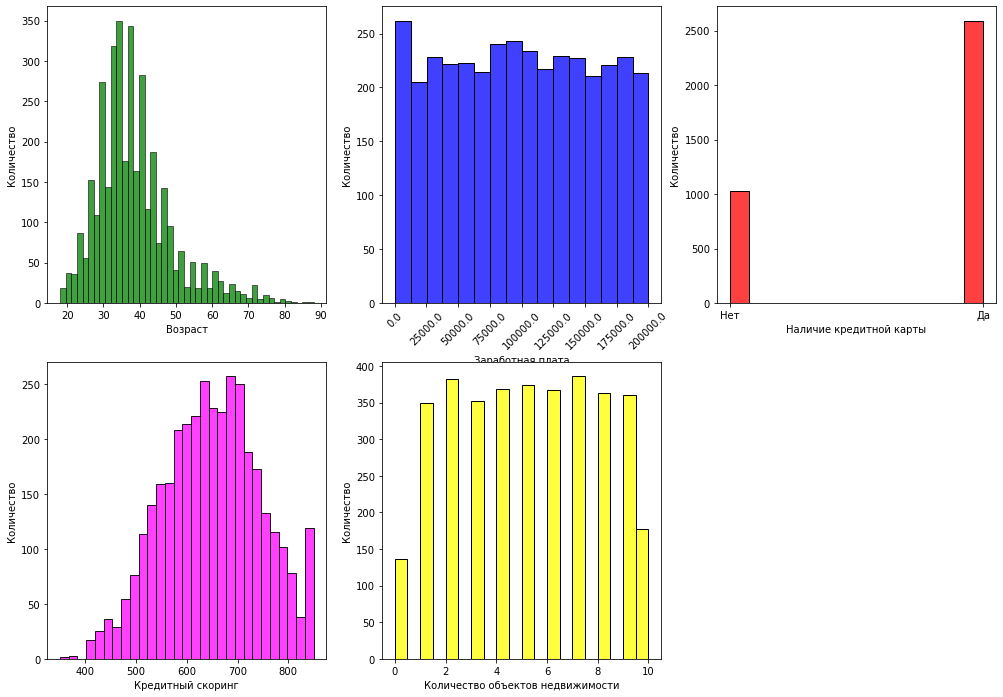

In [12]:
balance_graph(data)

Проверим остальные колонки, в которых представлены бинарные признаки. При помощи функции `balance_signs` подсчитаем уникальные значения по остальным колонкам. 

In [13]:
def balance_signs(df):
    data_temp = df.query('balance != balance').drop(['balance'], axis = 1)
    
    for col in data_temp.columns:
     
        if len(data_temp[col].value_counts().values) < 3:
            print('Количество уникальных значений в колонке {}'.format(col))
            print(data_temp[col].value_counts())
            print()

Итак, изучив результат отработки функции `balance_signs`, можно сказать, что пропуски в колонке `balance` имеют следующие клиенты: 
1. `1963` - мужчин, `1654` - женщин;
2. `2592` - имеют кредитную карту, `1025` - не имеют кредитную карту;
3. `1873` - активны, `1744` - не активны;
4. `3117` - действующих клиентов, `500` - ушедших клиентов;
5. `1199` клиентов из г. Рыбинск;
6. `2418` клиентов из г. Ярославль;
7. в Ростове Великом нет клиентов, у которых отсутствуют пропуски в балансе;

In [14]:
balance_signs(data)

Количество уникальных значений в колонке gender
0    1963
1    1654
Name: gender, dtype: int64

Количество уникальных значений в колонке credit_card
1    2592
0    1025
Name: credit_card, dtype: int64

Количество уникальных значений в колонке loyalty
1    1873
0    1744
Name: loyalty, dtype: int64

Количество уникальных значений в колонке churn
0    3117
1     500
Name: churn, dtype: int64

Количество уникальных значений в колонке rostov_vel
0    3617
Name: rostov_vel, dtype: int64

Количество уникальных значений в колонке rybinsk
0    2418
1    1199
Name: rybinsk, dtype: int64

Количество уникальных значений в колонке yaroslavl
1    2418
0    1199
Name: yaroslavl, dtype: int64



Итак, я не могу найти закономерность, которая позволит заполнить пропуски в колонке `balance`. 

Считаю, что эта величина вообще не поддается какому-то прогнозированию, поэтому воспользуюсь принципом GIGO (garbage in - garbage out) и не буду заполнять пропуски и вообще использовать данный признак для дальнейшего исследования. Думаю, что этот параметр не повлияет на исследование, а вот неверное заполнение пропусков в таком большом количестве повлияет напрямую. 

Рассмотрим датасет после изменений про помощи функции `head()` - все необходимые преобразования произведены, могу приступать к шагу исследовательского анализа данных (EDA). 

In [15]:
data.head()

,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,rostov_vel,rybinsk,yaroslavl
0,15677338,619,1,42,2,NaN,1,1,1,101348.88,1,0,0,1
1,15690047,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15662040,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,15744090,699,1,39,1,NaN,2,0,0,93826.63,0,0,0,1
4,15780624,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1,0


# Шаг 3 - Исследовательский анализ данных (EDA) <a id="step_3"></a>

Приступим к исследовательскому анализу данных. Целевая переменная для моей задачи - показатель оттока `churn`. 

Здесь и далее показатель `0` - клиент остался, `1` - клиент ушел. 

При помощи функции `EDA_first_step` изучим средние значения и стандартные отклонения признаков, а также сгруппируем столбцы по целевой переменной `churn`.

In [16]:
def EDA_first_step(df):
    print('Размер датасета:{}'.format(data.shape))
    print()
    display(data.describe())
    display(data.groupby('churn').mean())

In [17]:
EDA_first_step(data)

Размер датасета:(10000, 14)



,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,rostov_vel,rybinsk,yaroslavl
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,0.454300,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700,0.501400
std,7.193619e+04,96.653299,0.497932,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698,0.500023
min,1.560844e+07,350.000000,0.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,1.567126e+07,584.000000,0.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,1.573347e+07,652.000000,0.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000
75%,1.579597e+07,718.000000,1.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000
max,1.585843e+07,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,rostov_vel,rybinsk,yaroslavl
churn,,,,,,,,,,,,,
0,1.573390e+07,651.853196,0.427477,37.408389,5.033279,119535.864270,1.544267,0.707146,0.554565,99738.391772,0.212859,0.259199,0.527942
1,1.573279e+07,645.351497,0.559156,44.837997,4.932744,120746.971132,1.475209,0.699067,0.360825,101465.677531,0.399607,0.202749,0.397644


Итак, проанализируем каждую колонку:
1. `score` - Среднее значение кредитного скоринга по выборке совпадает со средним значением выборки оставшихся клиентов (`650 баллов`), для ушедших клиентов этот показатель чуть ниже (`645.35 балла`). 
2. `gender` - мужчин в выборке определенно больше, нежели женщин. Это подтверждается тем, что лишь 3й квартиль общей выборки- женский. Среди ушедших клиентов, однако, женщин чуть больше, нежели мужчин (среднее значение по колонке- `0.56`), тогда как среди оставшихся клиентов, наоборот, мужчин больше (среднее значение - `0.43`)
3. `age` - Средний возраст клиента - `38.9 лет`, медианное значение - `37 лет`, максимальный возраст - `92 года`. В разрезе оттока ушедшие клиенты имеют средний возраст выше, чем оставшиеся (`44.8 / 37.4 года`)
4. `objects` - количество объектов недвижимости у клиентов - от 0 до 10, среднее значение выборки совпадает со средними значениями по ушедшим и оставшимся клиентам (`5 объектов`)	
5. `balance` - среднее значение по всем выборкам примерно одинаково (`120000 руб`)
6. `products` - количество банковских продуктов- от 0 до 4. Среднее значение по всем выборкам - `1.5 шт.`, медианное по общей выборке - `1 шт.`. Если взглянуть на общую выборку, лишь 25% клиентов имеют 2 и более банковских продукта. 
7. `credit_card` - среднее значение по всем выборкам примерно одинаково (`0.70`), медианное значение по выборке - 1. Это значит, что как минимум половина клиентов банка имеет банковскую карту. 
8. `loyalty` - активность ушедших клиентов банка ожидаемо ниже, нежели у оставшихся (`0.36/0.55`). 
9. `estimated_salary` - среднее значение заработной платы среди всех клиентов - `100090 руб.`, медианное - незначительно ниже (`100193 руб.`). Однако если мы посмотрим на данные в разрезе оттока, то увидим, что средняя заработная плата ушедших клиентов выше, нежели у оставшихся (`101465 / 99738 руб`)
10. `churn` - средний показатель оттока - `0.2`, т.е. уходит каждый пятый клиент. 
11. `Города`. Если изучить выборку оставшихся клиентов, то больше всего клиентов будет из Ярославля (`53%`), далее - Рыбинск (`26%`) и Ростов Великий (`21%`). Среди ушедших клиентов доли распределены иначе- по `40%` клиентов из Ярославля и Ростова Великого и `20%` из Рыбинска. 

Построим графики распределения и посмотрим, как они соотносятся с наблюдениями. 

In [18]:
def EDA_plotter(df, dict_list):
    
    data_churn_no = df.loc[df.loc[:, 'churn'] == 0].drop(['rostov_vel', 'rybinsk', 'yaroslavl'], axis = 1)
    data_churn_yes = df.loc[df.loc[:, 'churn'] == 1].drop(['rostov_vel', 'rybinsk', 'yaroslavl'], axis = 1)

    for col in data_churn_no.drop(['user_id','churn'], axis = 1):
                
        plt.figure(figsize=(15, 5))
        locator = ticker.MultipleLocator (base=1)
        
        if data_churn_no[col].max() < 2:
        
            ax1 = plt.subplot(1, 2, 1)
            ax1 = sns.histplot(data_churn_no[col], color = 'green')
            plt.title(f"Клиент остался - {dict_list[col]}")
            ax1.set_xlabel(dict_list[col])
            ax1.set_ylabel('Количество')
            ax1.xaxis.set_major_locator (locator)
            ax1.set_xticklabels([' ', 'Нет', 'Да'])

            ax2 = plt.subplot(1, 2, 2)
            ax2 = sns.histplot(data_churn_yes[col], color = 'blue')
            plt.title(f"Клиент остался- {dict_list[col]}")
            ax2.set_xlabel(dict_list[col])
            ax2.set_ylabel('Количество')
            ax2.xaxis.set_major_locator (locator)
            ax2.set_xticklabels([' ', 'Нет', 'Да'])
        
        ax1 = plt.subplot(1, 2, 1)
        ax1 = sns.histplot(data_churn_no[col], color = 'green')
        plt.title(f"Клиент остался - {dict_list[col]}")
        ax1.set_xlabel(dict_list[col])
        ax1.set_ylabel('Количество')
        
        ax2 = plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
        ax2 = sns.histplot(data_churn_yes[col], color = 'blue')
        plt.title(f"Клиент ушел - {dict_list[col]}")
        ax2.set_xlabel(dict_list[col])
        ax2.set_ylabel('Количество')
        
        plt.show() 

In [19]:
dict_columns = {'score': 'кредитный скоринг', 'gender': 'гендер','age': 'возраст', 'objects': 'объекты недвижимости', 
                'balance': 'баланс счета', 'products': 'количество продуктов', 'credit_card': 'кредитная карта',
                'products': 'количество продуктов', 'loyalty': 'активность клиента', 'estimated_salary': 'заработная плата',
               'churn': 'отток клиентов', 'rostov_vel': 'Ростов Великий', 'rybinsk': 'Рыбинск', 'yaroslavl': 'Ярославль'}

In [20]:
data.head()

,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,rostov_vel,rybinsk,yaroslavl
0,15677338,619,1,42,2,NaN,1,1,1,101348.88,1,0,0,1
1,15690047,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15662040,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,15744090,699,1,39,1,NaN,2,0,0,93826.63,0,0,0,1
4,15780624,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1,0


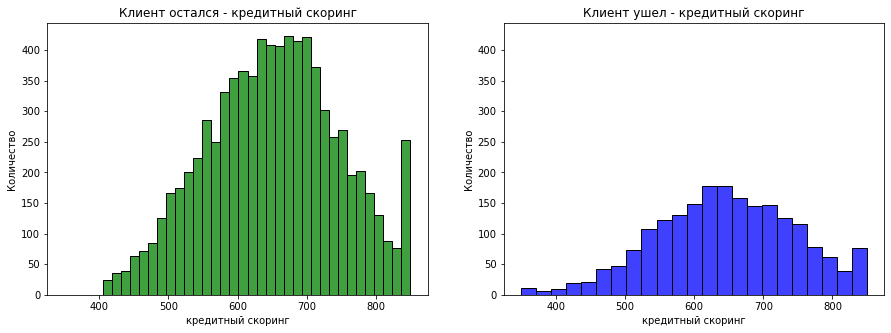

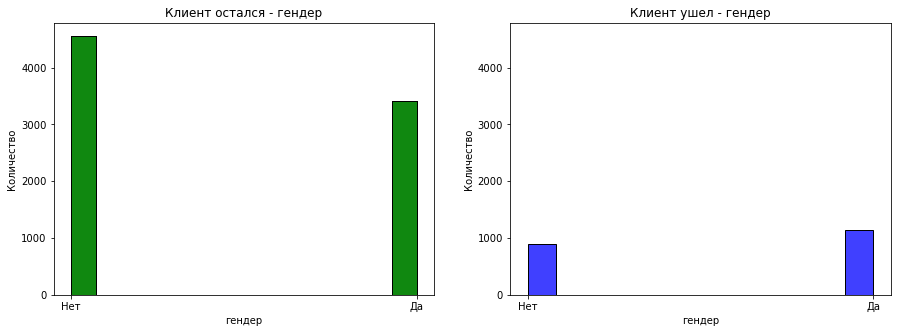

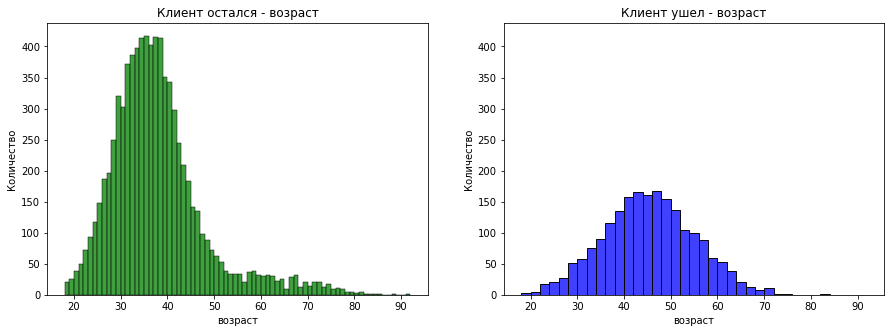

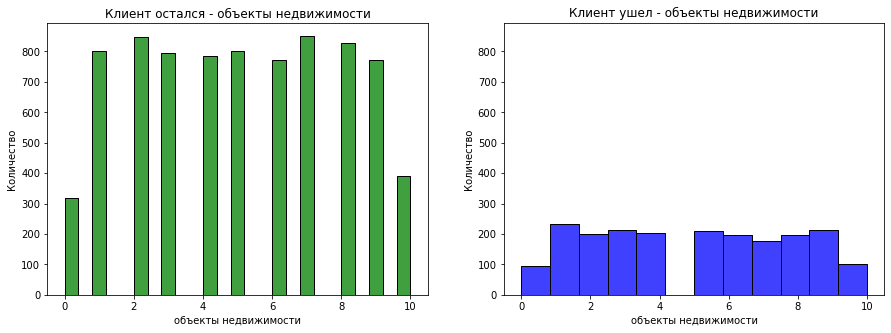

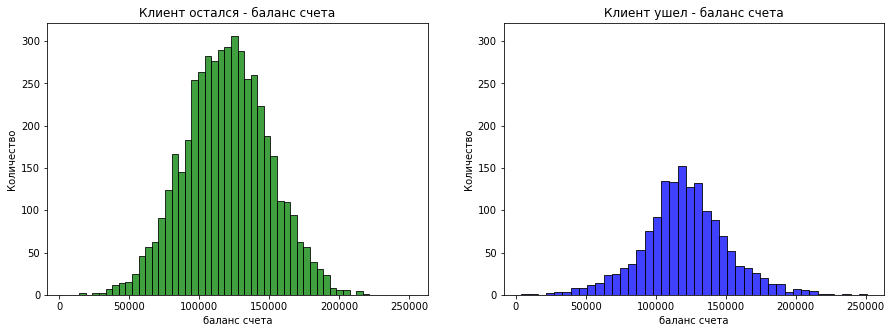

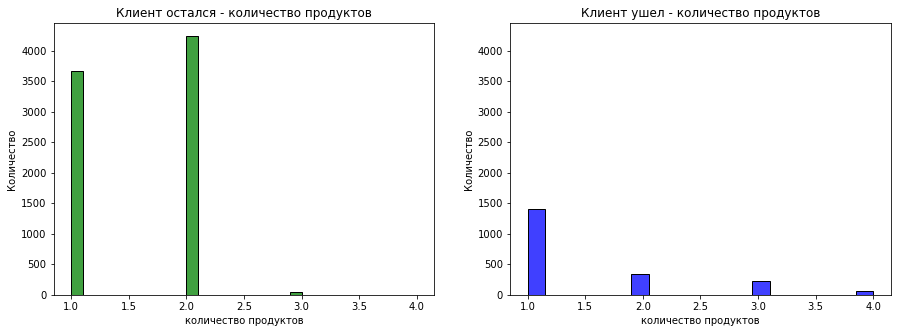

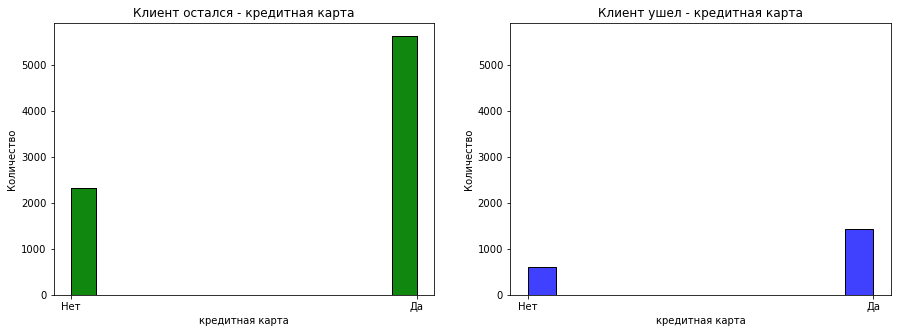

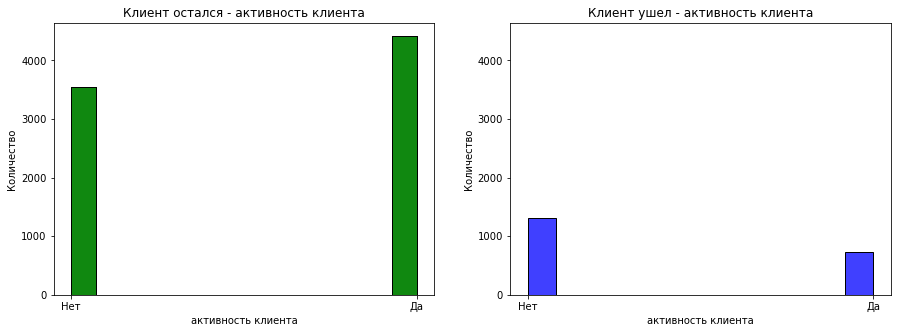

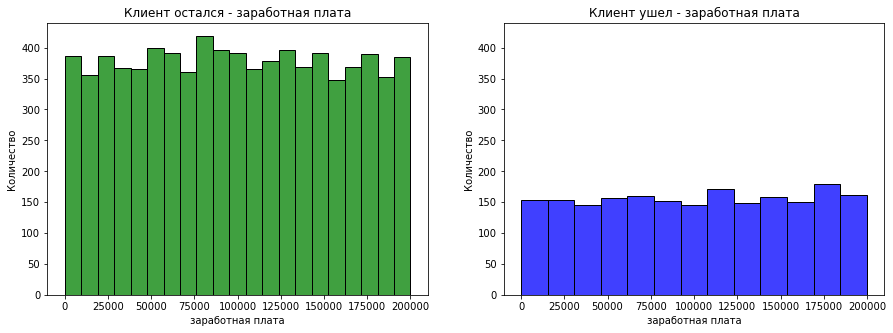

In [21]:
EDA_plotter(data, dict_columns)

Итак, при помощи функции `histplot()` было построены гистограммы признаков для оставшихся (зеленый) и ушедших (синий график) клиентов. Если рассмотреть графики, можно заметить следующее: 
- Распределение кредитного скоринга одинаковое для обоих групп клиентов,
- Среди оставшихся клиентов преобладают мужчины, среди ушедших - женщины,
- Преобладающий возраст оставшихся клиентов- от 30 до 40 лет, ушедших - от 40 до 50 лет,
- Количество объектов недвижимости и баланс счета - распределены одинаково для обоих групп,
- Большинство оставшихся клиентов используют 2 банковских продукта, тогда как ушедшие- 1,
- Большинство клиентов обоих групп имеет кредитную карту,
- Естественно, что активность оставшихся клиентов выше, чем у ушедших,
- Уровень заработной платы также распределен равномерно для обеих групп. 

ПРи помощи фукнкции `EDA_city` также рассмотрим разбивку по городам для оставшихся и ушедших клиентов. 
Как видно, в группе оставшихся клиентов около половины - это клиенты из Ярославля, и оставшаяся половина распредлена между Ростовом Великим и Рыбинском. В группе ушедших клиентов все иначе- первое место по доле оттока клиентов занимают Ярославль и Ростов Великий (по 40%), затем идет Рыбинск (20%). Такое распределение более, чем странно, т.к. количество клиентов в Ярославле намного больше, нежели в Ростове Великом. Можно предположить, что отток клиентов в Ростове Великом выше, нежели в иных городах области. 

In [22]:
def EDA_city(df, column1, column2): 
    
    plt.figure(figsize=(15, 5))
    ax1 = plt.subplot(1, 2, 1)
    ax1 = sns.barplot(data = df, x = df.index, y = column1)
    ax1.set_xlabel(' ')
    ax1.set_ylabel('Доля в %')
    plt.title(f"Клиент остался - разбивка по городам")
        
    ax2 = plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
    ax2 = sns.barplot(data = df, x = df.index, y = column2)
    ax2.set_xlabel(' ')
    ax2.set_ylabel('Доля в %')
    plt.title(f"Клиент ушел - разбивка по городам")
    
    plt.show() 

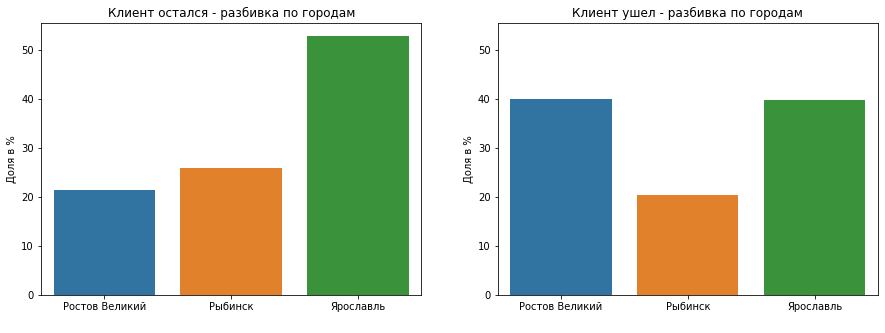

In [23]:
EDA_city(data_city_churn, 'churn_no', 'churn_yes')

Если посмотреть на сводную таблицу, то видно, что для Ярославля и Рыбинска отношение оставшихся-ушедших клиентов составляет 5:1, для Ростова Великого же - 2:1, т.е. уходит каждый третий клиент. Это очень важный факт, запомним его для дальнейшего анализа. 

In [24]:
data.pivot_table(index = 'churn', values = ['yaroslavl', 'rostov_vel', 'rybinsk'], aggfunc = 'sum')

,rostov_vel,rybinsk,yaroslavl
churn,,,
0,1695.0,2064.0,4204.0
1,814.0,413.0,810.0


Итак, предварительно мы можем составить портрет ушедшего клиента: это будет женщина 40-50 лет, использующая один банковский продукт- кредитную карту и проживающая в Ростове Великом или Ярославле. <a id="point_portrait"></a>
Проверим этот портрет при дальнейшей сегментизации клиентов.

Для того, чтобы перейти к сегментизации клиентов, при помощи функции `EDA_heatmap` сделаем тепловую карту матрицы корреляции признаков, чтобы исключить зависимые признаки, т.к. они напрямую влияют на сегментацию. 
Если проанализировать получившуюся тепловую карту, можно сказать, что:
- Взаимозависимых признаков, которые необходимо удалить, в таблице нет.
- Есть корреляция между городами, это нормально.
- Между собой коррелируют: возраст - отток клиентов и Ростов Великий - отток клиентов. Это может косвенно подтверждать мои предположения по портрету ушедшего клиента. 

Стоит перейти к сегментизации и составить портреты клиентов для каждой из групп. 

In [25]:
def EDA_heatmap(df):
    cm = round(df.corr(), 2)
    plt.figure(figsize=(12, 12))
    sns.heatmap(cm, annot=True, square=True)
    plt.show()

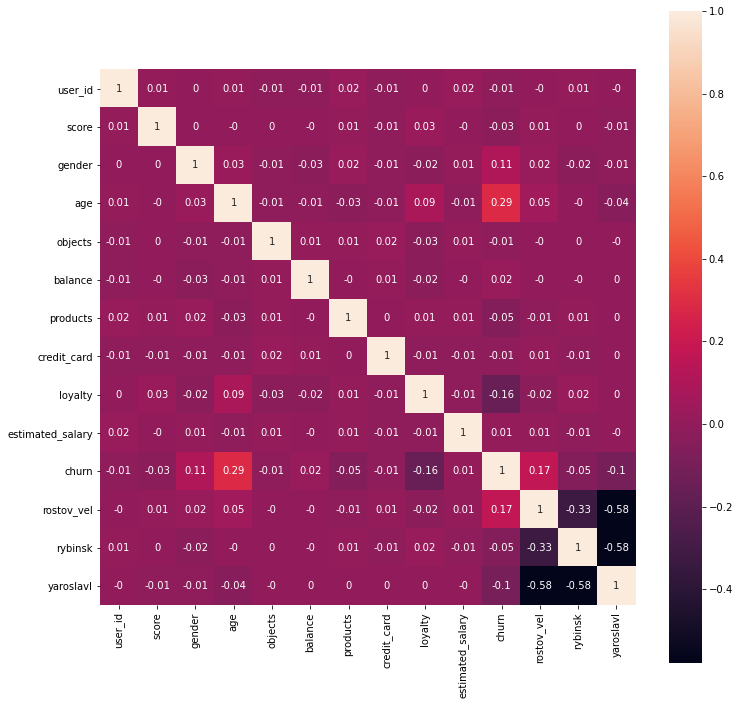

In [26]:
EDA_heatmap(data)

**Вывод:**

В ходе EDA были проанализированы признаки целевой переменной с целью найти взаимосвязь и составить портрет клиента.
Результатом EDA стал предварительный портрет ушедшего клиента: женщина 40-50 лет, использующая один банковский продукт- кредитную карту и проживающая в Ростове Великом или Ярославле. 

# Шаг 4 - Сегментация данных <a id="step_4"></a>

Приступим к сегментации клиентов. Перед тем, как начать сегментацию, стандартизируем данные и проведем регуляризацию, как делали выше - это важно для последующего обучения модели. Из признаков удалим колонку `balance` и обучим модель без нее. 

In [27]:
X = data.drop(['churn', 'balance'], axis = 1)
y = data['churn']

scaler = StandardScaler() # создадим объект класса StandardScaler
X_sc = scaler.fit_transform(X)    #обучаем стандартизатор и трансформируем выборку

Для сегментации используем алгоритм `KMeans`, однако необходимо знать количество кластеров. 
Количество кластеров можно найти: 
1. Эмпирическим путем подбора.
2. Отрисовкой дендрограммы
3. "Методом локтя" - "Elbow method"

В данной работе я буду использовать именно метод локтя, т.к. эмпирический путь может быть ошибочен, отрисовка дендрограммы - длительной. Метод локтя позволяет определить оптимальное количество кластеров за счет вычисления значений искажения и инерции. Та точка, после которой величина искажений падает не так явно, и является рекомендуемым количеством кластеров. 

In [28]:
def elbow_method(X):
    
    distortions = []
    K = range(1,10)
    
    for elem in K:
        kmeanModel = KMeans(n_clusters= elem)
        kmeanModel.fit(X)
        distortions.append(kmeanModel.inertia_)
        
    plt.figure(figsize=(15,5))
    plt.plot(K, distortions, 'bx-')
    plt.axvline(x=3, linestyle = '--', linewidth = 1, color = 'red')
    plt.xlabel('Количество кластеров')
    plt.ylabel('Значение искажений')
    plt.title('Оптимальное количество кластеров, рассчитанное при помощи "метода локтя"')
    plt.show()

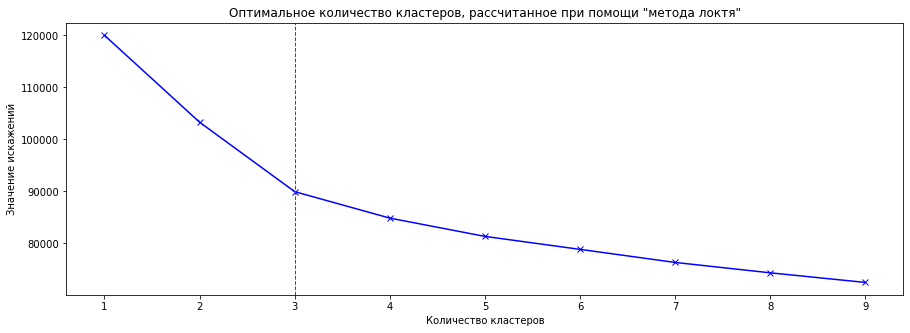

In [29]:
elbow_method(X_sc)

Как видно из графика, опимальное количество кластеров для моей модели- это 3. Перейдем к модели `KMeans` и напишем функцию `k_means_function`, которая расчитает необходимые кластеры и вернет таблицу с клиентами, разделенными по категориям. 

In [30]:
def k_means_function(df, X_sc):
    
    km = KMeans(n_clusters = 3, random_state=0) 
    labels = km.fit_predict(X_sc)
        
    data_k_means = df.drop(['balance'], axis = 1)
    data_k_means['labels'] = labels
        
    display(data_k_means.groupby(['labels']).mean())
    display(data_k_means.groupby(['labels', 'churn']).mean())
    
    return(data_k_means)

In [31]:
data_k_means = k_means_function(data, X_sc)

,user_id,score,gender,age,objects,products,credit_card,loyalty,estimated_salary,churn,rostov_vel,rybinsk,yaroslavl
labels,,,,,,,,,,,,,
0,1.573339e+07,649.668329,0.450937,38.511767,5.004587,1.530913,0.706621,0.516753,99899.180814,0.161548,0.0,0.0,1.0
1,1.573465e+07,651.333872,0.439645,38.890997,5.032297,1.539362,0.694792,0.529673,99440.572281,0.166734,0.0,1.0,0.0
2,1.573329e+07,651.453567,0.475488,39.771622,5.009964,1.519729,0.713830,0.497409,101113.435102,0.324432,1.0,0.0,0.0


user_id       score    gender        age   objects  \
labels churn                                                            
0      0      1.573301e+07  651.162226  0.428402  37.235966  5.005471   
       1      1.573535e+07  641.914815  0.567901  45.133333  5.000000   
1      0      1.573550e+07  652.104167  0.415698  37.839147  5.107558   
       1      1.573042e+07  647.484262  0.559322  44.147700  4.656174   
2      0      1.573418e+07  653.261357  0.439528  37.311504  5.011799   
       1      1.573144e+07  647.689189  0.550369  44.894349  5.006143   

              products  credit_card   loyalty  estimated_salary  rostov_vel  \
labels churn                                                                  
0      0      1.541389     0.707422  0.545433      99217.097331         0.0   
       1      1.476543     0.702469  0.367901     103439.278296         0.0   
1      0      1.544574     0.699128  0.567345      98602.369864         0.0   
       1      1.513317     0.673123  0.341404     103629.554818         0.0   
2      0      1.551032     0.716224  0.561652     102414.657876         1.0   
       1      1.454545     0.708845  0.363636      98403.886450         1.0   

              rybinsk  yaroslavl  
labels churn                      
0      0          0.0        1.0  
       1          0.0        1.0  
1      0          1.0        0.0  
       1          1.0        0.0  
2      0          0.0        0.0  
       1          0.0        0.0

Как видно, функция `k_means_function` отработала и разделила клиентов на 3 кластера. Видно, что подразделение шло именно по городам и наибольший отток мы наблюдаем в Ростове Великом, как и предполагалось ранее. Лидером оттока является группа 2. 

Применим функцию `clusters` для построения графиков распределения признаков по кластерам, а также построим диаграмму рассеяния с разбивкой по кластерам. Исходя из этого создадим портреты клиентов каждого кластера.

In [32]:
def clusters(df, dict_list):
    df0 = df.loc[df.loc[:, 'labels'] == 0].drop(['user_id', 'labels'], axis = 1)
    df1 = df.loc[df.loc[:, 'labels'] == 1].drop(['user_id', 'labels'], axis = 1)
    df2 = df.loc[df.loc[:, 'labels'] == 2].drop(['user_id', 'labels'], axis = 1)
    
    for col in df0:
        
        plt.figure(figsize=(20, 7))
        locator = ticker.MultipleLocator (base=1)
        
        if df0[col].max() < 2:
            
            ax1 = plt.subplot(1, 4, 1)
            ax1 = sns.histplot(df0[col], color = 'green')
            plt.title(f"Кластер №0 - {dict_list[col]}")
            ax1.set_xlabel(dict_list[col])
            ax1.set_ylabel('Количество')
            ax1.xaxis.set_major_locator (locator)
            ax1.set_xticklabels([' ', 'Нет', 'Да'])
            
            ax2 = plt.subplot(1, 4, 2, sharex=ax1, sharey=ax1)
            ax2 = sns.histplot(df1[col], color = 'blue')
            plt.title(f"Кластер №1 - {dict_list[col]}")
            ax2.set_xlabel(dict_list[col])
            ax2.set_ylabel('Количество')
            ax2.xaxis.set_major_locator (locator)
            ax2.set_xticklabels([' ', 'Нет', 'Да']) 
            
            ax3 = plt.subplot(1, 4, 3, sharex=ax1, sharey=ax1)
            ax3 = sns.histplot(df2[col], color = 'red')
            plt.title(f"Кластер №2 - {dict_list[col]}")
            ax3.set_xlabel(dict_list[col])
            ax3.set_ylabel('Количество')
            ax3.xaxis.set_major_locator (locator)
            ax3.set_xticklabels([' ', 'Нет', 'Да'])    
            
            ax4 = plt.subplot(1, 4, 4)
            ax4 = sns.scatterplot(x = data_k_means['labels'], y = data_k_means[col], hue = data_k_means['churn'])
            plt.title(f"Разбивка по кластерам - {dict_list[col]}")
            ax4.set_xlabel('Кластеры')
            ax4.set_ylabel(dict_list[col])
            ax4.yaxis.set_major_locator (locator)
            ax4.set_yticklabels([' ', 'Нет', 'Да']) 

            
        ax1 = plt.subplot(1, 4, 1)
        ax1 = sns.histplot(df0[col], color = 'green')
        plt.title(f"Кластер №0 - {dict_list[col]}")
        ax1.set_xlabel(dict_list[col])
        ax1.set_ylabel('Количество')

            
        ax2 = plt.subplot(1, 4, 2, sharex=ax1, sharey=ax1)
        ax2 = sns.histplot(df1[col], color = 'blue')
        plt.title(f"Кластер №1 - {dict_list[col]}")
        ax2.set_xlabel(dict_list[col])
        ax2.set_ylabel('Количество')

            
        ax3 = plt.subplot(1, 4, 3, sharex=ax1, sharey=ax1)
        ax3 = sns.histplot(df2[col], color = 'red')
        plt.title(f"Кластер №2 - {dict_list[col]}")
        ax3.set_xlabel(dict_list[col])
        ax3.set_ylabel('Количество')
        
        ax4 = plt.subplot(1, 4, 4)
        ax4 = sns.scatterplot(x = data_k_means['labels'], y = data_k_means[col], hue = data_k_means['churn'])
        plt.title(f"Разбивка по кластерам - {dict_list[col]}")
        ax4.set_xlabel('Кластеры')
        ax4.set_ylabel(dict_list[col])
 
        plt.show()  

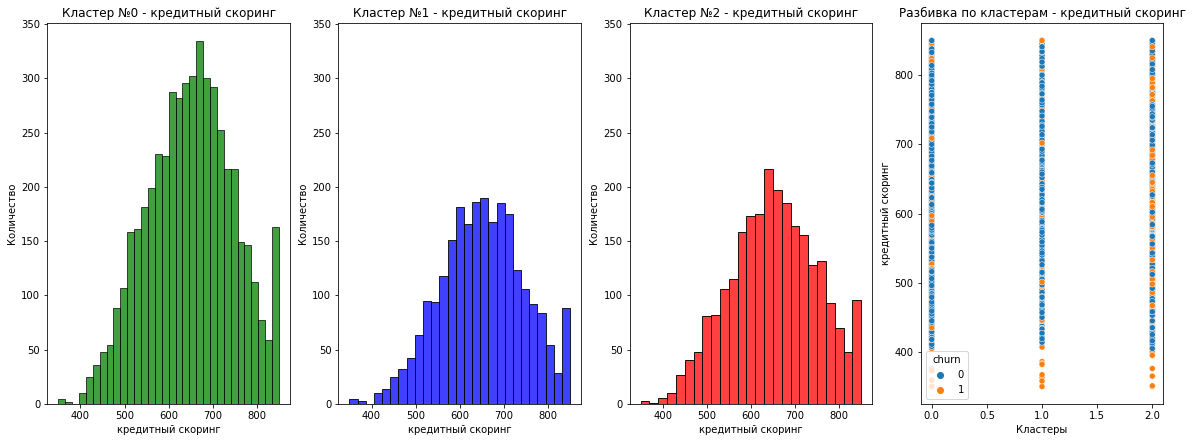

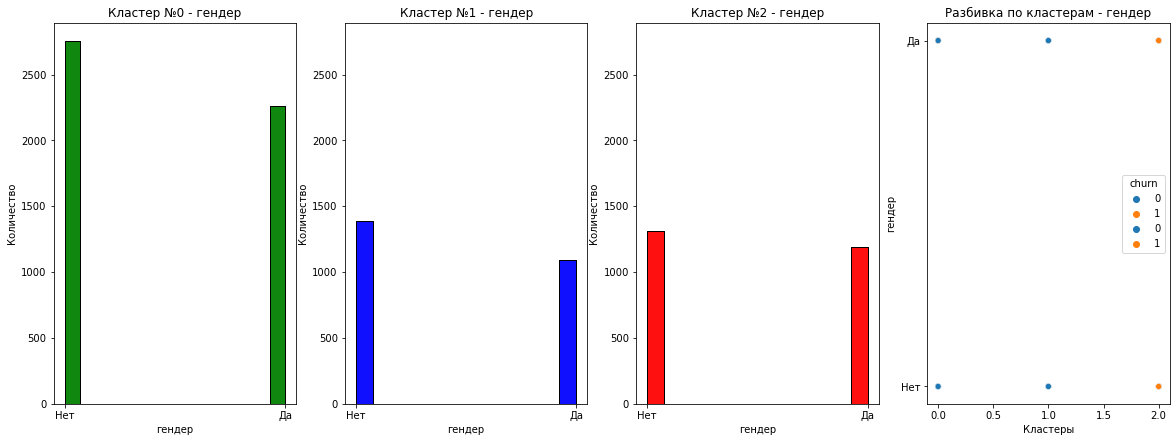

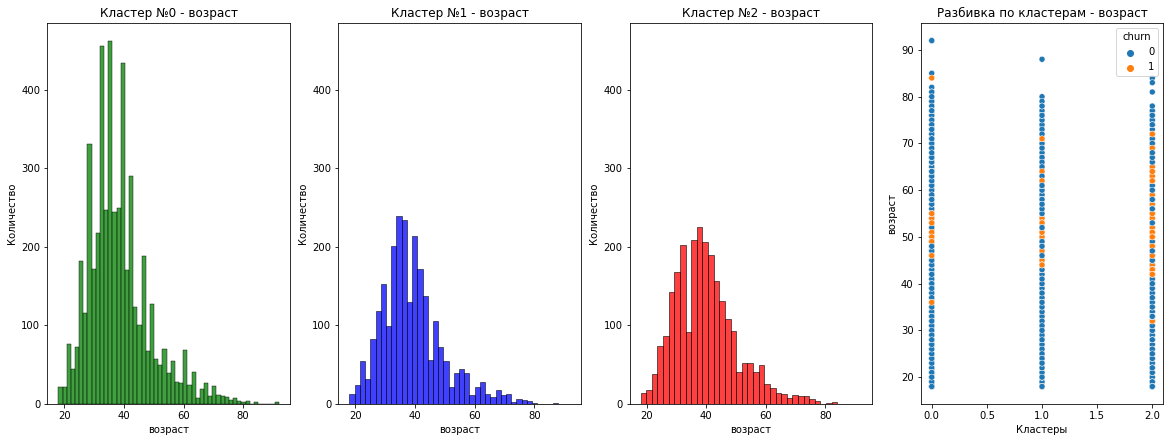

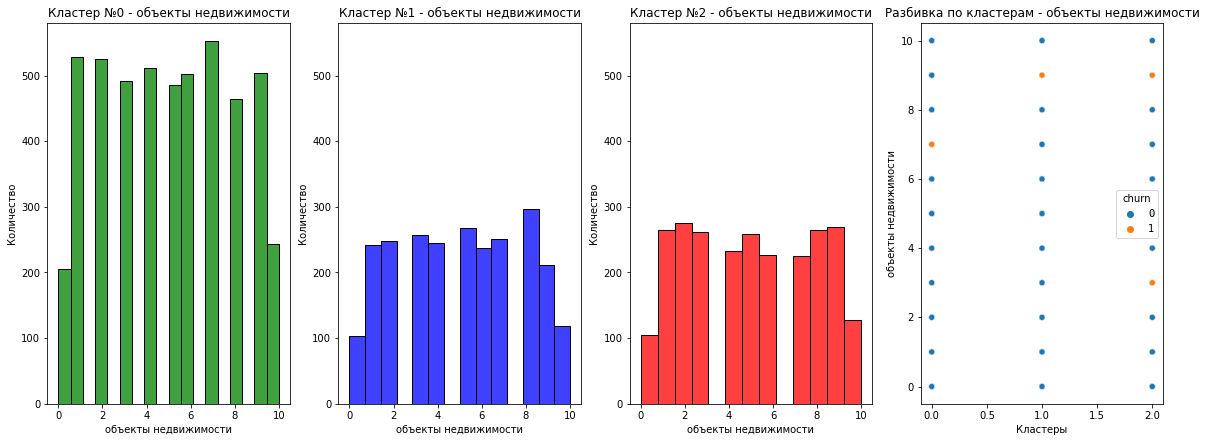

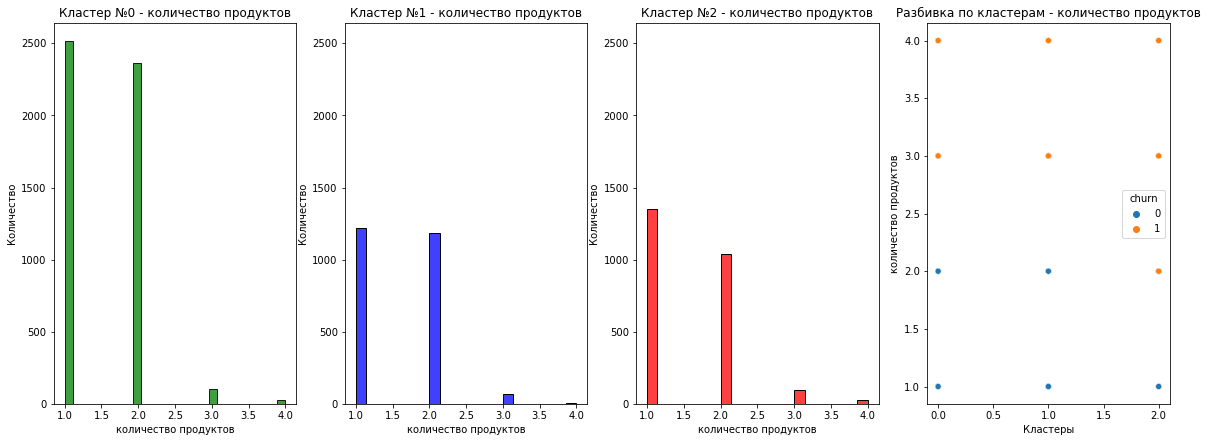

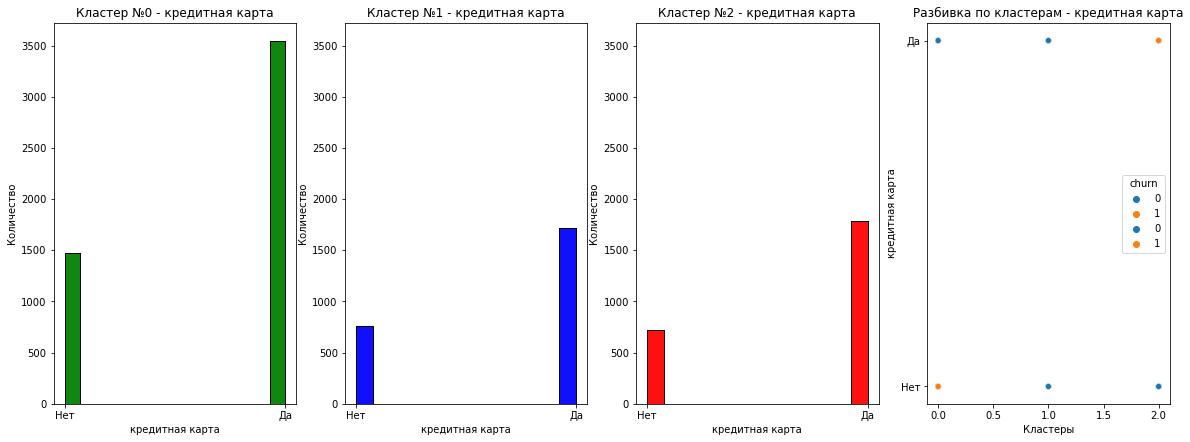

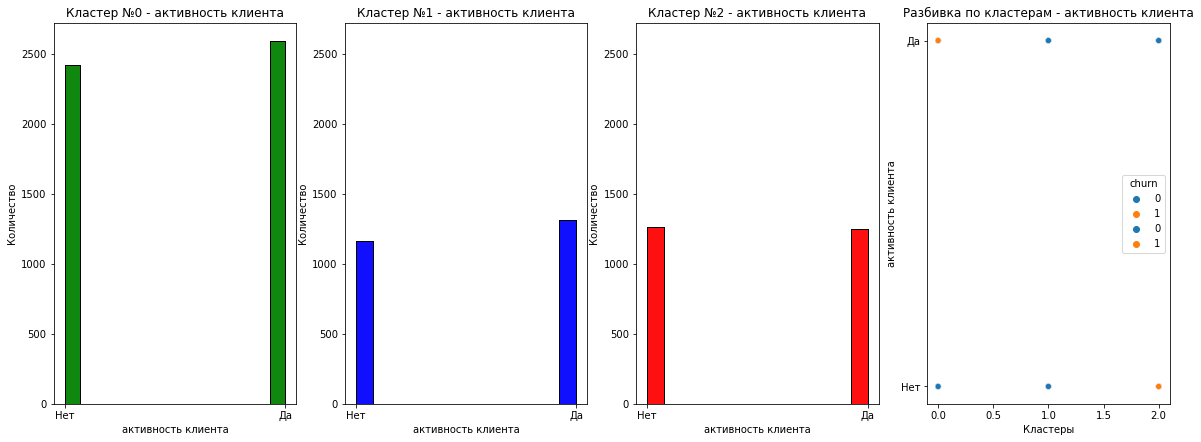

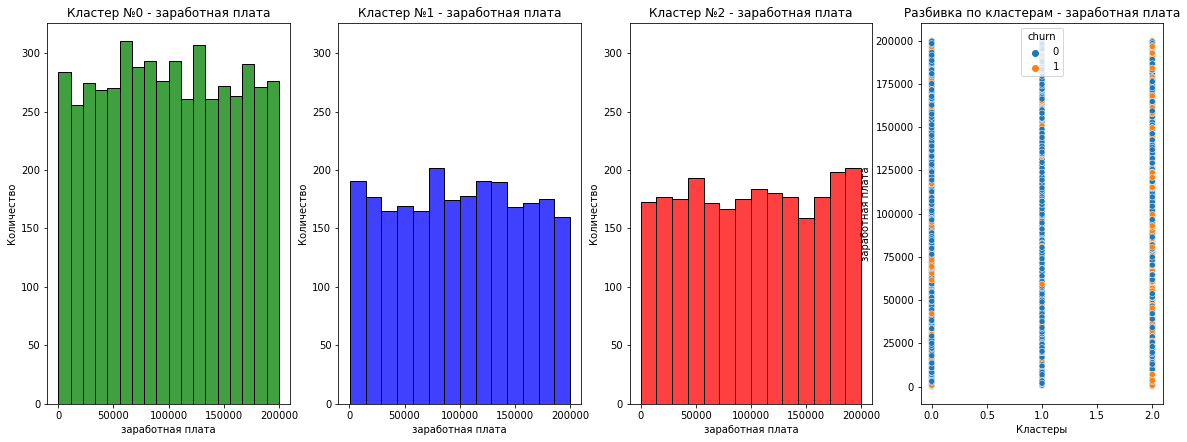

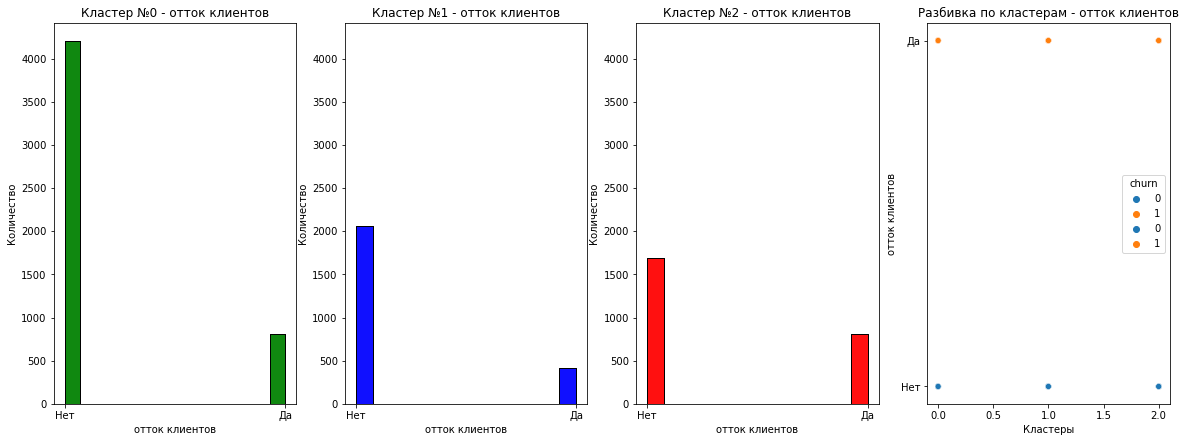

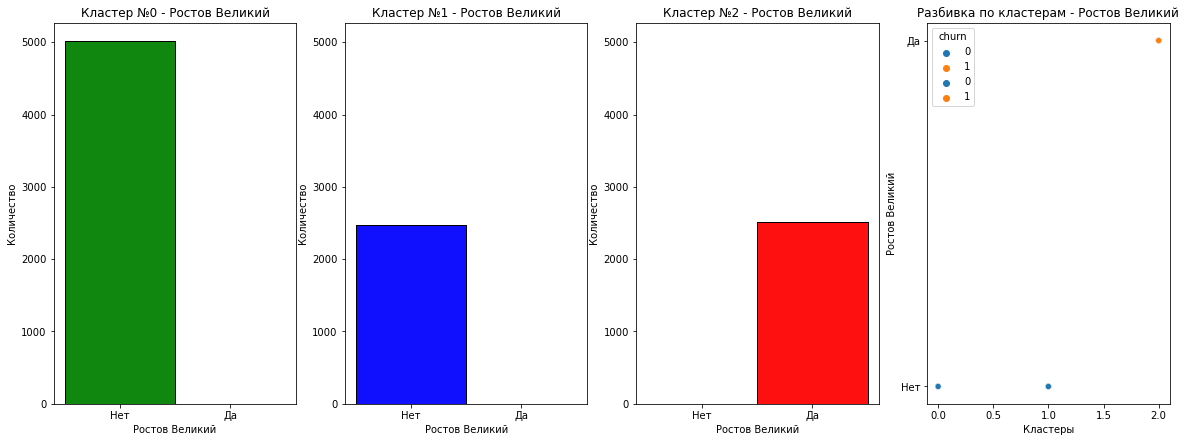

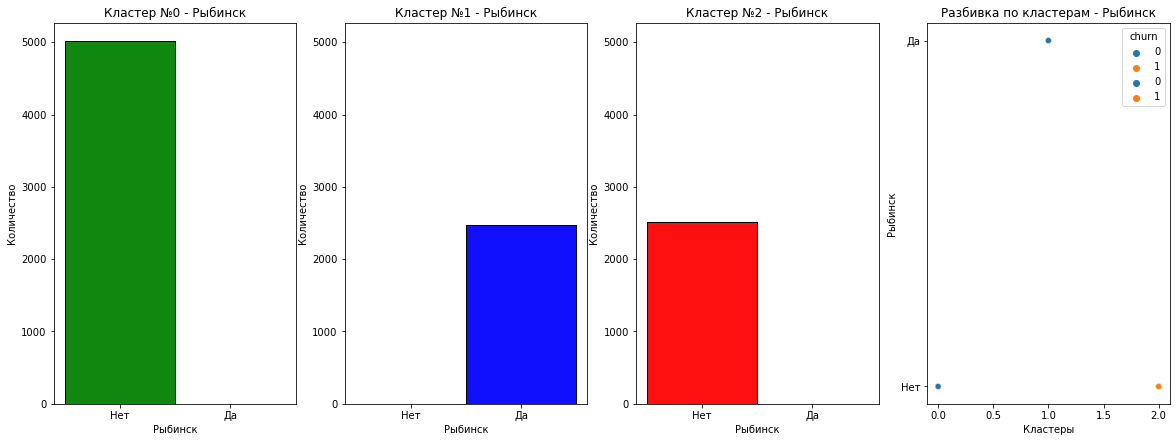

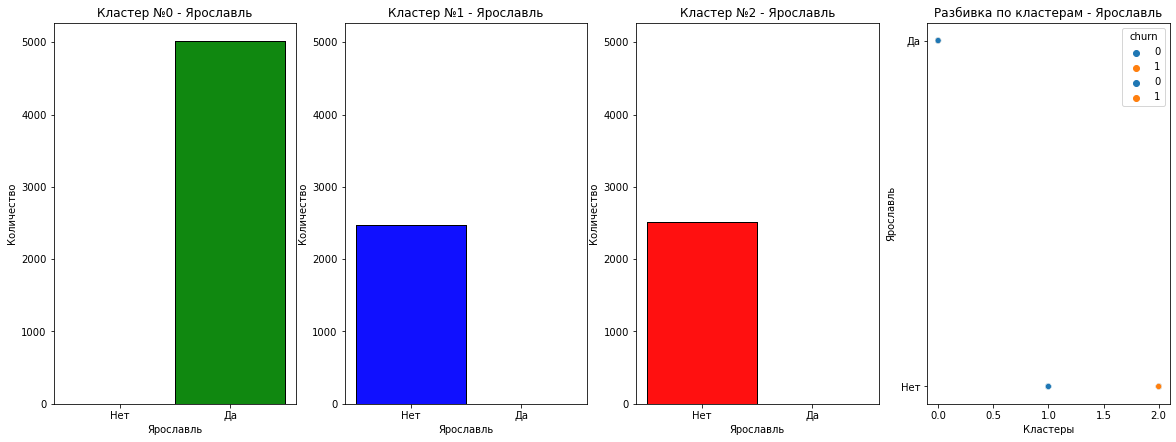

In [33]:
clusters(data_k_means,  dict_columns)

Исходя из полученной информации, можно создать следующие портреты пользователей каждого кластера 
(данные без скобок - для `churn = 0` (клиент остался), в скобках - `churn = 1` (клиент ушел)):

**Кластер №0**: 
- Баллы скоринга - 653 (641) баллов. Отток больше выражен для клиентов с баллами скоринга менее 400; 
- Гендер - Мужчина (Женщина);
- Возраст - 34 года (45 лет), наибольший отток - в категории от 48 до 55 лет; 
- 5 объектов недвижимости, частый отток наблюдается у клиентов с 7 объектами; 
- Пользуется 1,54 (1,47) продуктами банка, наибольший отток у клиентов с 3 и 4 продуктами; 
- Есть кредитка, отток идет среди клиентов, не имеющих кредитку; 
- Лоялен (не лоялен), отток наблюдается у активных клиентов;
- Средняя зарплата - 99899 руб. (103439 руб.), отток идет у клиентов со средней зарплатой от 55 до 75 тыс. руб;
- город Ярославль.

**Кластер №1**:
- Баллы скоринга - 651 (647) баллов. Отток больше выражен для клиентов с баллами скоринга менее 400;
- Гендер - Мужчина (Женщина);
- Возраст - 37 лет (44 года), наибольший отток - в категории от 46 до 53 лет; 
- 5 объектов недвижимости (4,6 объекта), частый отток наблюдается у клиентов с 9 объектами; 
- Пользуется 1,54 (1,51) продуктами банка,наибольший отток у клиентов с 3 и 4 продуктами; 
- Есть кредитка; 
- Лоялен (не лоялен);
- Средняя зарплата - 99440 руб. (103629 руб.);
- город Рыбинск.

**Кластер №2**:
- Баллы скоринга - 651 (647) баллов, отток встречается у клиентов с любыми баллами скоринга;
- Гендер - Мужчина (Женщина);
- Возраст - 39 (45) лет, наибольший отток - в категории от 42 до 65 лет; 
- 5 объектов недвижимости, частый отток наблюдается у клиентов с 5 и 9 объектами;
- Пользуется 1,55 (1,45) продуктами банка, наибольший отток у клиентов с 2-4 продуктами; 
- Есть кредитка, наибольший отток - среди клиентов с кредитными картами;
- Лоялен (не лоялен), отток наблюдается у неактивных клиентов;
- Средняя зарплата - 101113 руб. (98403 руб.), наибольший отток - у клиентов с зарплатой до 20 тыс. руб., с 60 до 100 тыс. руб., ок. 125 тыс. руб. и выше;
- город Ростов Великий.

Как видно из составленных портретов, подтверждается портрет ушедшего клиента, который был составлен мною [ранее](#point_portrait). Актуализирую его на основе данных клиента из кластера 2:

**Ушедший клиент - это женщина 45 лет, использующая один продукт- кредитную карту, имеющая среднюю зарплату 98403 руб. и проживающая в Ростове Великом**.

Стоит заметить, что во всех трех кластерах ушедшие клиенты:
- Имеют возраст ощутимо выше среднего (44-45 лет),
- Женнщины,
- Имеют зарплату выше среднего. 

Стоит обратить на это внимание при составлении дальнейших рекомендации банковских продуктов для каждого кластера. 

**Вывод:**

В процессе сегментации данных было найдено оптимальное количество сегментов (3 сегмента) и проведена сегментация пользователей. Затем каждый сегмент был изучен и на основании этого был составлен портрет типичного клиента для каждого сегмента. Клиенты были поделены на сегменты по региональному признаку, тем самым для каждого города присутствия банка составлен собственный портрет клиента. В дальнейшем на основании полученных портретов будут даны рекомендации по банковскому продукту. 

# Шаг 5 - Проверка гипотез <a id="step_5"></a>

Проверим статистические гипотезы по данным имеющегося датасета. 

**Гипотеза №1**: 
- **Н0**: Доходы ушедших и оставшихся клиентов равны.
- **Н1**: Доходы ушедших клиентов больше, чем у оставшихся.

Для проверки данной гипотезы будем использовать односторонний тест `ttest_1samp`, где сравним среднее значение доходов ушедших клиентов с генеральной совокупностью доходов оставшихся клиентов. 

Здесь `mean_yes` - это среднее значение дохода для ушедших клиентов, `sample_no` - генеральная совокупность доходов оставшихся клиентов. 

In [34]:
mean_yes = data.query('churn == 1')['estimated_salary'].mean()
sample_no = data.query('churn == 0')['estimated_salary']

In [35]:
alpha = 0.05

result_region = st.ttest_1samp(sample_no, mean_yes)

# тест односторонний: p-value будет в два раза меньше
print('p-значение:', result_region.pvalue / 2)


if (result_region.pvalue / 2 < alpha) and (mean_yes > sample_no.mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу") 

p-значение: 0.0036337280360721745
Отвергаем нулевую гипотезу


Как видно после проведения теста, нулевая гипотеза была отвергнута в пользу альтернативной - "Доходы ушедших клиентов больше, чем у оставшихся", т.е. доходы ушедших и оставшихся клиентов статистически различаются и это сравнение не в пользу оставшихся клиентов. 
Для того, чтобы еще раз перепроверить себя, возьмем среднее по генеральной совокупности доходов оставшихся клиентов `sample_no.mean()`. Видно, что это значение меньше, чем среднее значение доходов ушедших клиентов. Тем самым, можно еще раз подтвердить, что в результате проверки нулевая гипотеза была отвергнута в пользу альтернативной. 

In [36]:
mean_yes - sample_no.mean()

1727.2857587372564

In [37]:
sample_no.mean()

99738.39177194514

**Гипотеза №2**: 
- **Н0**: Доля ушедших клиентов одинакова для всех городов. 
- **Н1**: Между долями ушедших клиентов, обслуживающихся в различных городах, есть статистическая разница. 

Для проверки данной гипотезы я буду применять датасет, где названия кодов не были перекодированы - [`data_temp`](#data_temp) . Сделаю сводную таблицу `city_total`, в которой будет указано общее количество и количество ушедших клиентов для каждого города, а затем при помощи функции `stat_test` проведу z-тест для каждой пары городов. Результататом отработки функции будет таблица с парами городов и не отвергнутой гипотезой по каждой из пар.

In [38]:
city_total = data_temp.pivot_table(index = ['City'], values = 'Churn', aggfunc = ['sum', 'count'])
city_total.columns = ['successes', 'total']
city_total.head()

,successes,total
City,,
Ростов Великий,814,2509
Рыбинск,413,2477
Ярославль,810,5014


In [39]:
def stat_test(df, k, m):
    alpha = 0.05
  
    successes_one = df.successes[k]
    trials_one = df.total[k] - df.successes[k]
    
    successes_two = df.successes[m]
    trials_two = df.total[m] - df.successes[m]
    
    # пропорция успехов в первой группе:
    p_one = successes_one/trials_one
    
    # пропорция успехов во второй группе:
    p_two = successes_two/trials_two
    
    # пропорция успехов в комбинированном датасете:
    p_combined = (successes_one + successes_two) / (trials_one + trials_two)
    
    # разница пропорций в датасетах
    difference = p_one - p_two
    
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials_one + 1/trials_two))
    
    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1) 
    
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    if p_value < alpha:
        return ['H1', round(p_value, 2)]
    else:
        return ['H0', round(p_value, 2)]
    

In [40]:
def stat_events (dataframe, steps_dict):
    values = []
    steps = range(0,3)
    
    for j in steps:
        if j < 2:
            value = stat_test(dataframe, j, j+1)
            values.append(value)
        else:
            value = stat_test(dataframe, 0, 2)
            values.append(value)
            
    stat_events = pd.DataFrame({'step': steps_dict.values(), 'val': values})
    return stat_events

Создам словарь `steps_dict`, который соотнесет каждый шаг функции с парой сравниваемых городов и запустим функцию `stat_events` 

In [41]:
steps_dict = {0: "Ростов Великий - Рыбинск", 1: "Рыбинск - Ярославль", 2: "Ярославль - Ростов Великий"}

In [42]:
stat_events(city_total, steps_dict)

,step,val
0,Ростов Великий - Рыбинск,"[H1, 0.0]"
1,Рыбинск - Ярославль,"[H0, 0.49]"
2,Ярославль - Ростов Великий,"[H1, 0.0]"


После отработки функции видно, что в двух парах была отвергнута нулевая гипотеза в пользу альтернативной. 

**Н1: Между долями ушедших клиентов, обслуживающихся в различных городах, есть статистическая разница**
- Ростов Великий - Рыбинск, 
- Ярославль - Ростов Великий. 

А в третьей паре - нулевая гипотеза не была отвергнута. 

**Н0: Доля ушедших клиентов одинакова для всех городов**
- Рыбинск - Ярославль.

Это значит, что доля ушедших клиентов в городах Рыбинске и Ярославле- статистически не различается, тогда как в Ростове Великом она иная. 

У нас есть таблица `city_total` с общим количеством клиентов и количеством ушедших клиентов. Преобразуем ее и проверим, различаются ли доли оттока среди городов. 

In [43]:
city_total['churn_percent'] = round(city_total['successes']*100/city_total['total'], 2)
city_total

,successes,total,churn_percent
City,,,
Ростов Великий,814,2509,32.44
Рыбинск,413,2477,16.67
Ярославль,810,5014,16.15


Путем несложных преобразований подтверждено, что функция `stat_test` отработала верно. Действительно, процент оттока клиентов в Рыбинске и Ярославле одинаков и составляет около 16%, тогда как доля оттока в Ростове Великом намного выше и составляет около 32%. Соответственно, в парах "Ростов Великий - Рыбинск", "Ярославль - Ростов Великий" верно, что нулевая гипотеза была отвергнута, тогда как в паре  "Рыбинск - Ярославль" Н0 отвергнута не была. 

# Шаг 6 - Выводы и рекомендации <a id="step_6"></a>

В ходе исследовательской работы был исследован отток клиентов «Метанпромбанка» в трех городах присутствия: Ярославль, Рыбинск и Ростов Великий и составлен портрет клиентов, склонных уходить из банка. 

В ходе исследовательского анализа данных было замечено, что если рассмотреть всех ушедших клиентов в разрезе городов присутствия банка, видно, что доли ушедших пользователей из Ростова Великого и Ярославля - одинаковы, хотя Ярославль представлен большим количеством клиентов. Как подтвердилось далее, доля оттока пользователей в Ярославле и Рыбинске- 16%, тогда как в Ростове Великом - 32%. 

Также в процессе EDA был составлен предварительный портрет ушедшего пользователя (женщина 40-50 лет, проживающая в Ярославле или Ростове Великом, использующая один банковский продукт- кредитную карту). Далее в процессе сегментизации пользователей на 3 группы при помощи алгоритма `KMeans` данный портрет был подтвержден и дополнен. 

Было выяснено, что для всех трех групп пользователей ушедшие пользователи:

- Имеют возраст ощутимо выше среднего (44-45 лет),
- Женнщины,
- Имеют зарплату выше, чем у оставшихся клиентов. 

Исходя из вышесказанного, приведем портреты пользователей каждого кластера 
(данные без скобок - для `churn = 0` (клиент остался), в скобках - `churn = 1` (клиент ушел)) и дадим рекомендации: 

**Кластер №0**: 
- Баллы скоринга - 653 (641) баллов. Отток больше выражен для клиентов с баллами скоринга менее 400; 
- Гендер - Мужчина (Женщина);
- Возраст - 34 года (45 лет), наибольший отток - в категории от 48 до 55 лет; 
- 5 объектов недвижимости, частый отток наблюдается у клиентов с 7 объектами; 
- Пользуется 1,54 (1,47) продуктами банка, наибольший отток у клиентов с 3 и 4 продуктами; 
- Есть кредитка, отток идет среди клиентов, не имеющих кредитку; 
- Лоялен (не лоялен), отток наблюдается у активных клиентов;
- Средняя зарплата - 99899 руб. (103439 руб.), отток идет у клиентов со средней зарплатой от 55 до 75 тыс. руб;
- город Ярославль.

Нулевой кластер представлен клиентами из Ярославля. Как мы видим, здесь представлены активные пользователи, использующие несколько банковских продуктов. Однако идет отток у клиентов, которые используют большое количество банковских продуктов, в т.ч. и кредитки. Возможно, ушедших пользователей не устраивают условия предлагаемых кредитных карт. Т.к. ушедшие пользователи относятся к категории предпенсионного возраста, я бы предложила следующие продукты
( <font color='blue'>*уникальный продукт для каждого кластера*</font>):

- Накопительные вклады пролонгированного действия (от полугода-года) с повышенной ставкой,
- <font color='blue'>*Кредитная карта с более выгодными условиями для клиентов данного возраста (например, удлиненный грейс-период, скидки у партнеров Банка - продуктовые ритейлеры, магазины для дома и ремонта, автозаправки)*</font>
- Дебетовая карта с повышенным кэшбэком на покупки у партнеров Банка - продуктовые ритейлеры, магазины для дома и ремонта, автозаправки.
- Кредитные продукты для клиентов с низким скорингом (с повышенными ставками кредитования и короткими сроками). 
- Карта рассрочки для женщин - на покупки в магазинах косметики, одежды и товаров для дома. 

**Кластер №1**:
- Баллы скоринга - 651 (647) баллов. Отток больше выражен для клиентов с баллами скоринга менее 400;
- Гендер - Мужчина (Женщина);
- Возраст - 37 лет (44 года), наибольший отток - в категории от 46 до 53 лет; 
- 5 объектов недвижимости (4,6 объекта), частый отток наблюдается у клиентов с 9 объектами; 
- Пользуется 1,54 (1,51) продуктами банка,наибольший отток у клиентов с 3 и 4 продуктами; 
- Есть кредитка; 
- Лоялен (не лоялен);
- Средняя зарплата - 99440 руб. (103629 руб.);
- город Рыбинск.

Кластер №1 очень схож по условиям с кластером №0, основное отличие- в городе присутствия (Рыбинск). Т.к. портреты ушедших клиентов схожи, я бы оставила все те же рекомендации, что и для кластера №0. Т.к. здесь не наблюдается оттока клиентов с кредитками, кредитные карты из рекомендации для кластера №1 убираю. 

- Накопительные вклады пролонгированного действия (от полугода-года) с повышенной ставкой;
- Дебетовая карта с повышенным кэшбэком на покупки у партнеров Банка - продуктовые ритейлеры, магазины для дома и ремонта, автозаправки;
- Кредитные продукты для клиентов с низким скорингом (с повышенными ставками кредитования и короткими сроками);
- <font color='blue'>*Т.к. клиенты лояльно относятся к кредитным продуктам, возможно предложить рефинансирование кредитов других банков.</font>* 
- Карта рассрочки для женщин - на покупки в магазинах косметики, одежды и товаров для дома. 

**Кластер №2**:
- Баллы скоринга - 651 (647) баллов, отток встречается у клиентов с любыми баллами скоринга;
- Гендер - Мужчина (Женщина);
- Возраст - 39 (45) лет, наибольший отток - в категории от 42 до 65 лет; 
- 5 объектов недвижимости, частый отток наблюдается у клиентов с 5 и 9 объектами;
- Пользуется 1,55 (1,45) продуктами банка, наибольший отток у клиентов с 2-4 продуктами; 
- Есть кредитка, наибольший отток - среди клиентов с кредитными картами;
- Лоялен (не лоялен), отток наблюдается у неактивных клиентов;
- Средняя зарплата - 101113 руб. (98403 руб.), наибольший отток - у клиентов с зарплатой до 20 тыс. руб., с 60 до 100 тыс. руб., ок. 125 тыс. руб. и выше;
- город Ростов Великий.

В этом кластере наблюдается максимальный отток клиентов, клиенты проживают в Ростове Великом. Здесь отток наблюдается даже у клиентов среднего возраста и использующих 2 банковских продукта, в т.ч и кредитную карту. Наибольший отток - среди клиентов с очень низким и средним доходом. Здесь я могу порекомендовать следующее: 

- Накопительные вклады пролонгированного действия (от полугода-года) с повышенной ставкой;
- <font color='blue'>*Накопительные вклады с повышенной ставкой в связке с пенсионными социальными картами - для категории 55-65 лет;</font>* 
- Дебетовая карта с повышенным кэшбэком на покупки у партнеров Банка - продуктовые ритейлеры, магазины для дома и ремонта, автозаправки;
- Кредитные продукты для клиентов с низким скорингом и низким доходом (с повышенными ставками кредитования и короткими сроками);
- <font color='blue'>*Для клиентов среднего возраста (42-45 лет), возможно, будут интересны инвестиционные продукты*</font>;
- Карта рассрочки для женщин - на покупки в магазинах косметики, одежды и товаров для дома.

Также я бы рекомендовала обратить внимание на клиентское обслуживание в г. Ростов Великий - возможно, причины оттока также скрыты в каком-либо неудобстве для клиентов со стороны банка (неудобное расположение, некомпетентный персонал, плохая репутация банка в городе). Все это вкупе позволит уменьшить отток и повысить лояльность клиентов. 